# Qs 1:

In [4]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/gurpreetsingh/Downloads/USA_Housing.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


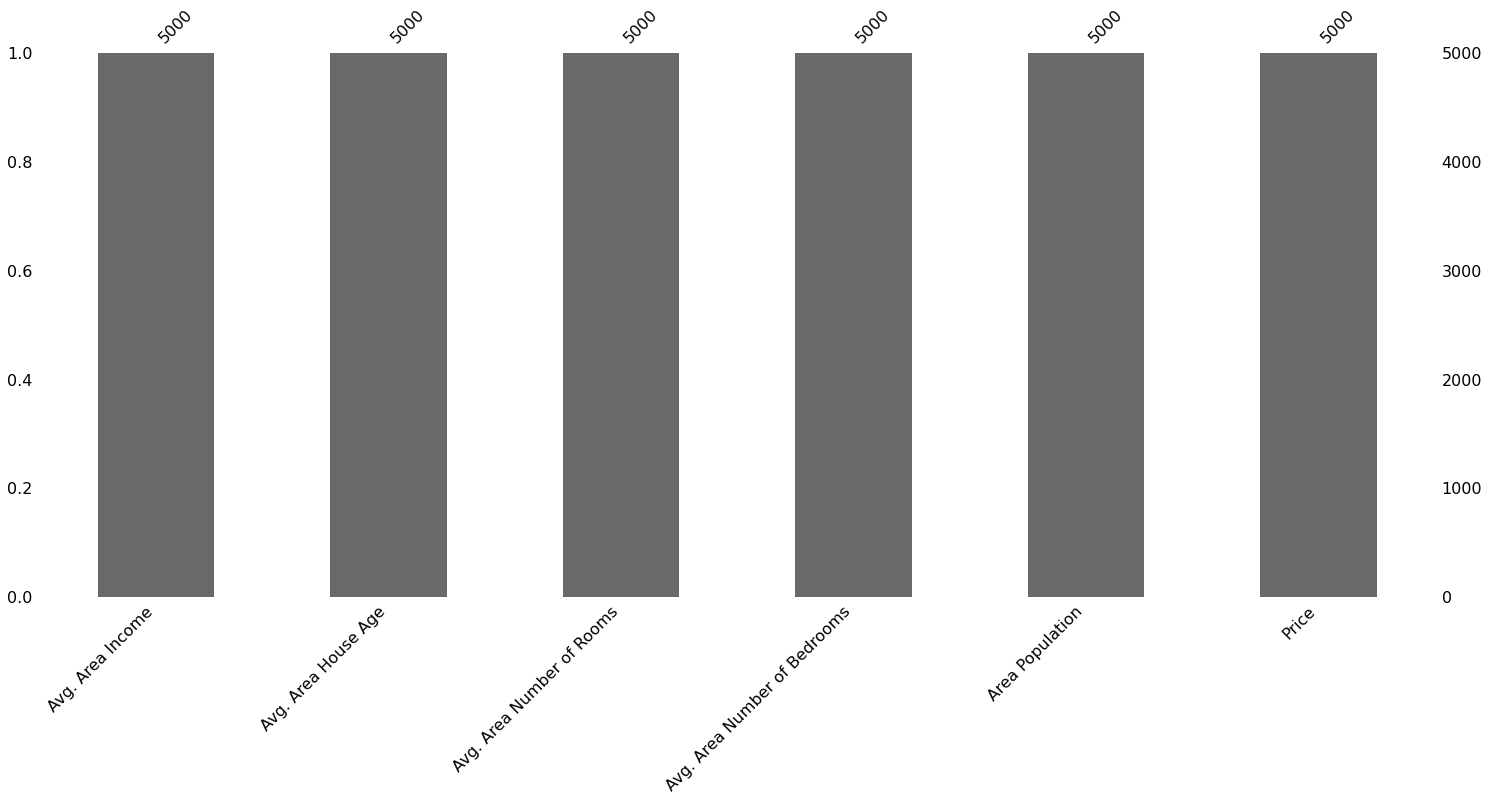

In [858]:
import missingno as ms

ms.bar(df)

In [859]:
# import seaborn as sns

# sns.heatmap(df.iloc[:,0:5],annot = True)

(a)

In [5]:
X = df.iloc[:,0:5]

Y = df.iloc[:,5]

Y = np.array(Y)

Y = Y.reshape(-1,1)

Y
Y


array([[1059033.558],
       [1505890.915],
       [1058987.988],
       ...,
       [1030729.583],
       [1198656.872],
       [1298950.48 ]])

(b)

In [6]:
from sklearn.preprocessing import StandardScaler

In [12]:
#Scaling independent features

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled = np.insert(X_scaled, 0,values = 1, axis = 1)
X_scaled


array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462915, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

(c)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
kfcv = KFold(n_splits=5, random_state=1, shuffle=True)
reg = LinearRegression()
score = cross_val_score(reg, X_scaled, Y,cv=kfcv,scoring='r2', n_jobs=-1)
print('r2 score=',score)

r2 score= [0.92159352 0.9103751  0.9122196  0.91893547 0.9245546 ]


(d)


In [21]:
length = int(len(X_scaled)/5) #length of each fold
folds = []
fold = []
for i in range(4):
    folds += [X_scaled[i*length:(i+1)*length]]
    fold += [Y[i*length:(i+1)*length]]
folds += [X_scaled[4*length:len(X_scaled)]]
fold += [Y[4*length:len(Y)]]


for i in range(5):
    A = folds[i].T.dot(folds[i])
    B = np.linalg.inv(A)
    C = B.dot(folds[i].T)
    print('beta[',i,']=',C.dot(fold[i]))
beta = C.dot(fold[i])

beta[ 0 ]= [[1232520.82436027]
 [ 230053.82011674]
 [ 164869.90681465]
 [ 123144.316607  ]
 [  -4319.87860484]
 [ 146204.47035747]]
beta[ 1 ]= [[1230009.05918553]
 [ 235925.17559967]
 [ 160924.00123151]
 [ 116428.49568679]
 [   3692.21216587]
 [ 153625.82670895]]
beta[ 2 ]= [[ 1.23470442e+06]
 [ 2.26568158e+05]
 [ 1.67027841e+05]
 [ 1.19907998e+05]
 [-5.82080764e+01]
 [ 1.50669416e+05]]
beta[ 3 ]= [[1235025.33304607]
 [ 229703.08992717]
 [ 162908.47548914]
 [ 128212.58479099]
 [   6143.83316522]
 [ 148930.76530435]]
beta[ 4 ]= [[1228395.64873178]
 [ 226609.86315982]
 [ 166215.40330451]
 [ 119035.36375791]
 [   5285.24637925]
 [ 153581.05825795]]


(e)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(folds[4], fold[4], test_size=0.3, random_state=42)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

y_predict=X_train.dot(beta)

array([1753328.16415196])

# Qs 2

In [30]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [31]:
df.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [32]:
X = df.iloc[:,0:5]

y = df.iloc[:,5]

In [33]:
## Scaling X values 
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.028660,-0.296927,0.021274,0.088062,-1.317599,-0.490081
1,1.000808,0.025902,-0.255506,-0.722301,0.403999,0.775508
2,-0.684629,-0.112303,1.516243,0.930840,0.072410,-0.490211
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734,0.080843
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387,-1.702518


In [44]:

train_index = int(0.56 * df.shape[0])
test_index = int(0.7*df.shape[0])

X_train,X_test,X_val = X[:train_index],X[train_index:test_index],X[test_index:]
y_train,y_test,y_val = y[:train_index],y[train_index:test_index],y[test_index:]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
2795,94292.26363,5.993314,7.278783,5.36,53620.89050
2796,62938.21671,6.623682,7.661923,3.15,48947.35792
2797,72124.77146,6.181948,7.953234,5.19,45415.72130
2798,56398.33365,5.793524,7.120717,4.16,50909.69708


In [35]:
print(X.shape,X_train.shape,X_test.shape,X_val.shape)

(5000, 5) (2800, 5) (700, 5) (1500, 5)


In [36]:
learning_rates =[0.001,0.01,0.1,1]
model_coefficients_list = []
r2_scores = []
for i in learning_rates:
  model = SGDRegressor(penalty='l2',alpha=i,max_iter=1000)
  model.fit(X_train,y_train)
  model_coefficients_list.append(model.coef_)
  y_test_pred = model.predict(X_test)
  test_r2_score = r2_score(y_test,y_test_pred)
  y_val_pred = model.predict(X_val)
  val_r2_score = r2_score(y_val,y_val_pred)
  avg_r2_score =  (test_r2_score +  val_r2_score)/2
  r2_scores.append(avg_r2_score)

best_index =r2_scores.index(max(r2_scores))
print('Best regression coefficient are :',model_coefficients_list[best_index])

Best regression coefficient are : [-1.68913060e+13  3.31634951e+10  2.62022316e+10  5.32792830e+10
  3.47974272e+10]


# Qs 3

In [2]:
headers =  ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [ ]:
df = pd.read_csv('/content/imports-85.data',names = headers,na_values = '?')

In [875]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [876]:
df.isna().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [1]:
df.dropna(subset=['price'])
df = df.fillna(df.mean())
df = df.fillna(df.mode().iloc[0])

NameError: name 'df' is not defined

In [878]:
df.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [879]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [880]:
df['num_doors'].value_counts()

four    116
two      89
Name: num_doors, dtype: int64

In [881]:
df['num_cylinders'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [882]:
df.replace({'num_doors':{'four':4,'two':2},'num_cylinders':{'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace=True)

In [883]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [884]:
df=pd.get_dummies(df,columns = ['body_style','drive_wheels'],prefix=["body","drive"])

In [885]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,122.0,alfa-romero,gas,std,2,front,88.6,168.8,64.1,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,122.0,alfa-romero,gas,std,2,front,94.5,171.2,65.5,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,audi,gas,std,4,front,99.8,176.6,66.2,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,audi,gas,std,4,front,99.4,176.6,66.4,...,22,17450.0,0,0,0,1,0,1,0,0


In [886]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [887]:
df['make'] = label_encoder.fit_transform(df['make'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['engine_location'] = label_encoder.fit_transform(df['engine_location'])
df['fuel_type'] = label_encoder.fit_transform(df['fuel_type'])

In [888]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,27,13495.0,1,0,0,0,0,0,0,1
1,3,122.0,0,1,0,2,0,88.6,168.8,64.1,...,27,16500.0,1,0,0,0,0,0,0,1
2,1,122.0,0,1,0,2,0,94.5,171.2,65.5,...,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,1,1,0,4,0,99.8,176.6,66.2,...,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,1,1,0,4,0,99.4,176.6,66.4,...,22,17450.0,0,0,0,1,0,1,0,0


In [ ]:
df['fuel_system'] = np.where(df['fuel_system'].str.contains('pfi'),1,0)
print(df['fuel_system'].value_counts())

In [890]:
df['engine_type'] = np.where(df['engine_type'].str.contains('ohc'),1,0)
print(df['engine_type'].value_counts())

1    189
0     16
Name: engine_type, dtype: int64


In [891]:
model = LinearRegression()

In [892]:
X = df.drop(columns = ['price'],axis =1)
y= df['price']

In [893]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [894]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(205, 31) (143, 31) (62, 31)


In [895]:
model.fit(X_train,y_train)
train_data_pred = model.predict(X_train)
train_accuracy = r2_score(y_train,train_data_pred)

test_data_pred = model.predict(X_test)
test_accuracy = r2_score(y_test,test_data_pred)

print('Training data accuracy is',train_accuracy,'& test data accuracy is',test_accuracy)

Training data accuracy is 0.9134805419388004 & test data accuracy is 0.804442243576259


In [896]:
#Applying PCA
from sklearn.decomposition import PCA
r2_mat = []

for i in range(1,X.shape[1]+1):
  pca = PCA(n_components = i)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.fit_transform(X_test)
  model.fit(X_train_pca,y_train)
  train_data_pred = model.predict(X_train_pca)
  train_accuracy = r2_score(y_train,train_data_pred)

  test_data_pred = model.predict(X_test_pca)
  test_accuracy = r2_score(y_test,test_data_pred)
  r2_mat.append(test_accuracy)

Text(0, 0.5, 'R2 score')

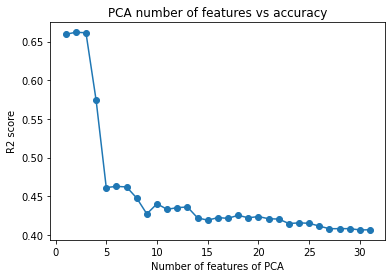

In [897]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,32),r2_mat,marker='o')
plt.title('PCA number of features vs accuracy')
plt.xlabel('Number of features of PCA')
plt.ylabel('R2 score')